## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#**Importing Airbnb Dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= '/content/drive/MyDrive/Airbnb NYC 2019.csv'

#**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(path)

#**Analyse the Data set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Interpretation: In the data set each colum have total 48895 values. There are columns name, host_name,last_review and reviews_per_month that have lesser non null value than 48895. Hence this need to be cleaned before analysising.in the below dataset, number of null values can be seen in each column**   

In [ ]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000




1.   From the above description of data, it can be said that mean price of room_ type is 152.72, maximum price of room_type is 10000 and minimum price of room_type is 0 that looks wrong entry of data.
2.   Mean of availability of room is 112 and maximum value of room availablity is 365 also.
3. minimum night that a visitor has to stay in a room is 1. 

**Data Cleaning**
1. **Replcement of non null values.**
2. **corrcetion of corrupt data**. 

There are 16 non null values in column **name**, 21 in **host_name**, 10052 in **review per month** and 10052 in **last_review**.
Null vlaue in **name** and **host_name** has been replaced by NA and Null vlaue in **review per month** has been replaced by 0.  we can drop and remain the column last_review in dataset, as i'm not going to use this column.

In [ ]:
df['name'].fillna("not applicable", inplace= True)
df['host_name'].fillna("not applicable", inplace= True)
df['reviews_per_month'].fillna(0, inplace= True)
print(df.isnull().any())

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


**Drop the row which have minimum number of nights greater than availability**

In [ ]:
drop_corrupt_data=df.drop(df[(df["minimum_nights"]>df["availability_365"])  &  (df["availability_365"]>0)].index.tolist())


**Data Analysis**

# **Analysis 1 : Availability of rooms in various neighbourhood group**

In [ ]:
count_neighbourhood_group=df['neighbourhood_group'].value_counts().sort_values(ascending = False)
print(count_neighbourhood_group)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [ ]:
# Availability of rooms in various neighbourhood group
Availability_of_rooms=df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().reset_index(name='availability_365')
print(Availability_of_rooms)


   neighbourhood_group        room_type  availability_365
0                Bronx  Entire home/apt        158.000000
1                Bronx     Private room        171.331288
2                Bronx      Shared room        154.216667
3             Brooklyn  Entire home/apt         97.205147
4             Brooklyn     Private room         99.917983
5             Brooklyn      Shared room        178.007264
6            Manhattan  Entire home/apt        117.140996
7            Manhattan     Private room        101.845026
8            Manhattan      Shared room        138.572917
9               Queens  Entire home/apt        132.267176
10              Queens     Private room        149.222716
11              Queens      Shared room        192.186869
12       Staten Island  Entire home/apt        178.073864
13       Staten Island     Private room        226.361702
14       Staten Island      Shared room         64.777778


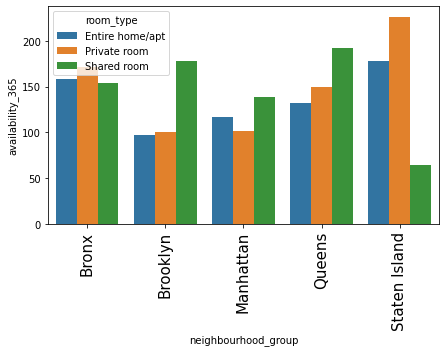

In [ ]:
#avilability of rooms in various neighbourhood group
plt.figure(figsize=(7,4))
sns.barplot(x='neighbourhood_group', y='availability_365',hue ='room_type', data=Availability_of_rooms)
plt.xticks(rotation = 90,size =15,)
ax = plt.gca()

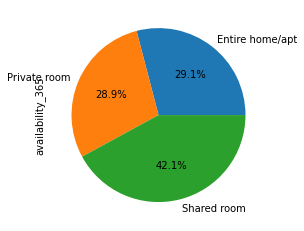

In [ ]:
#avilability of various rooms_types
df.groupby('room_type')['availability_365'].mean().plot.pie(autopct = "%1.1f%%")

#**Analysis 2 : Top 10 Host**

In [ ]:
most_hostings=df['host_name'].value_counts().sort_values(ascending = False).head(10)
most_hostings

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [ ]:
name_host=['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground', 'Sarah', 'Daniel', 'Jessica', 'Maria']         

<function matplotlib.pyplot.show>

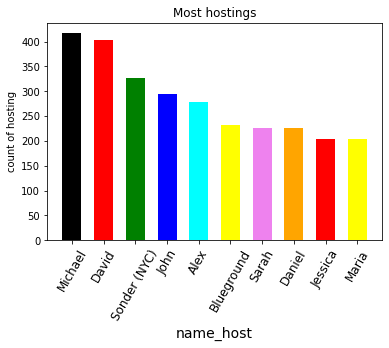

In [ ]:
plt.bar(name_host,most_hostings,color=['black', 'red', 'green', 'blue', 'cyan','yellow','violet','orange','red','yellow'], width=.6)
plt.title('Most hostings')
plt.xlabel('name_host',size =14)
plt.ylabel('count of hosting')
plt.xticks(rotation=60,size= 12)
plt.show

#**Analysis 3: Mean price of Various Room types**

In [ ]:
mean_price=df.groupby('room_type')['price'].mean()

In [ ]:
print(mean_price)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


In [ ]:
room_type=['Entire home/apt','Private room','Shared room']
print(room_type)



['Entire home/apt', 'Private room', 'Shared room']


<function matplotlib.pyplot.show>

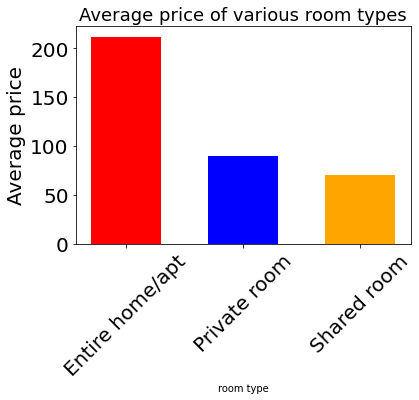

In [ ]:
plt.bar(room_type,mean_price,color=['red', 'blue', 'orange'], width=0.6)
plt.title('Average price of various room types',size=18)
plt.ylabel('Average price')
plt.xlabel('room type',size=10)
plt.xticks(rotation=45)
plt.show

**Hence Entire homes are costliest and shared rooms are cheapest**


# **Analysis 4: Cheapest neighbourhood group** 

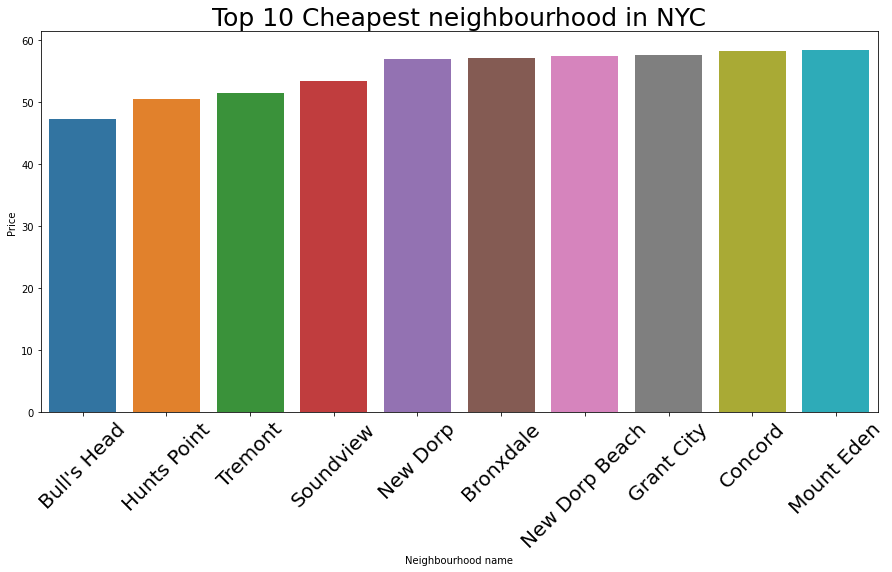

In [ ]:
plt.figure(figsize=(15,7))
top_10_cheapest_nbhd = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = True).reset_index()
top_10_cheapest_nbhd.head(10)
sns.barplot(x = top_10_cheapest_nbhd['neighbourhood'].head(10), y= top_10_cheapest_nbhd['price'].head(10))
plt.xticks(rotation = 45,size =20)

plt.title('Top 10 Cheapest neighbourhood in NYC', size = 25)
plt.xlabel('Neighbourhood name')
plt.ylabel('Price')

s = 20

plt.rc('font', size=s) 
plt.rc('axes', titlesize=s) 
plt.rc('axes', labelsize=s) 
plt.rc('xtick', labelsize=s) 
plt.rc('ytick', labelsize=s) 
plt.rc('legend', fontsize=s) 

plt.show()

# ** Analysis 5: Minimum cost to be paid for a visit**

In [ ]:
df.shape

(48895, 17)

In [ ]:
df['name'].nunique()

47906

In [ ]:
df['cost']=df['price']*df['minimum_nights']

Text(0, 0.5, 'Price')

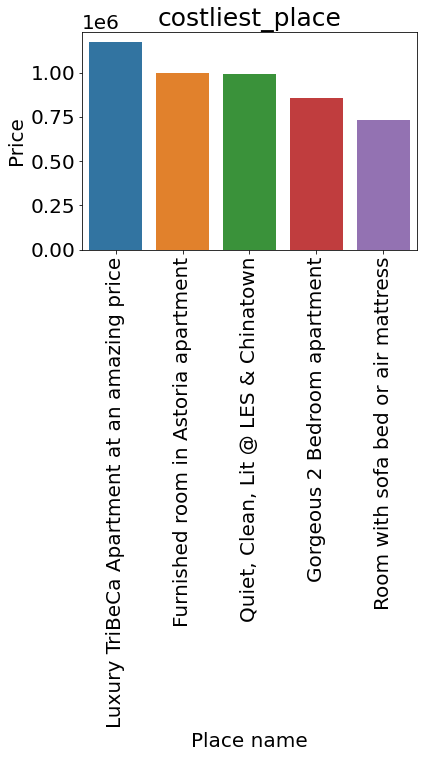

In [ ]:
costliest_place= df.groupby('name')['cost'].mean().sort_values(ascending = False).reset_index().head(5)
sns.barplot(x = costliest_place['name'].head(5), y= costliest_place['cost'].head(5))
plt.xticks(rotation = 90,size =20)
plt.title('costliest_place', size = 25)
plt.xlabel('Place name')
plt.ylabel('Price')


# Problem faced during analysis
1. I came to know that it is very difficult to deal with a data set without pretreatment on it. I faced problems due to non null values in the data set so first I analysed the data set. I found that there are some columns that consist null values in thier data. I replaced these null values to suitable values like Zero & NA. 
2. While exploring the data I found that there are over 10000 row which have null values in reviews_per_month column. Either I can drop these values or replace them with other data.
3. In counting of properties according to different properties type by neighbourhood group I faced difficulties in ploting graph having two group by i.e (neighbourhood_group, properties_type) to counter this I came to know how to use sea born.
9. On the first look to data anybody will heed on the price and may take decision to visit that place on the basis of price. initially I was also going on the same way but later i realised that consideration of minimum night is also necessary to find total expenditure. so i took both factor price and minimum night to determine the total expenditure and could also find the cheapest place to visit. 
